## Observations and Insights 

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on=["Mouse ID"], how = "outer")

# Display the data table for preview
combined_data.tail()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4
1892,z969,Naftisol,Male,9,30,45,73.867845,4


In [34]:
# Checking the number of mice.
num_of_mice = mouse_metadata["Mouse ID"].nunique()
num_of_mice

249

In [35]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mice_id = combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"])]
dup_mice_id.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [36]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_id = combined_data.loc[combined_data.duplicated(subset="Mouse ID")]
dup_mouse_id.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [37]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.drop_duplicates(subset="Mouse ID")
clean_df.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
50,s508,Ramicane,Male,1,17,0,45.0,0
60,f966,Capomulin,Male,16,17,0,45.0,0
65,m546,Ramicane,Male,18,16,0,45.0,0
75,z578,Ramicane,Male,11,16,0,45.0,0
85,j913,Ramicane,Female,4,17,0,45.0,0


In [38]:
# Checking the number of mice in the clean DataFrame.
num_of_mice_clean_df = clean_df["Mouse ID"].count()
print(f'There are {num_of_mice_clean_df} mice in the dataset.')

There are 249 mice in the dataset.


## Summary Statistics

In [53]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
tumor_mean = clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"].map("{:,.2f}".format)
tumor_median = clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"].map("{:,.2f}".format)
tumor_variance = clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"].map("{:,.2f}".format)
tumor_std_dev = clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"].map("{:,.2f}".format)
tumor_sem = clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"].map("{:,.2f}".format)

# Putting multiple series together
tumor_stats = pd.concat([tumor_mean, tumor_median, tumor_variance, tumor_std_dev, tumor_sem], axis = 1)
tumor_stats.columns = ["Tumor Mean", "Tumor Median", "Tumor Var", "Tumor Std Dev", "Tumor SEM"]
tumor_stats.head()

,Tumor Mean,Tumor Median,Tumor Var,Tumor Std Dev,Tumor SEM
Drug Regimen,,,,,
Capomulin,45.00,45.00,0.00,0.00,0.00
Ceftamin,45.00,45.00,0.00,0.00,0.00
Infubinol,45.00,45.00,0.00,0.00,0.00
Ketapril,45.00,45.00,0.00,0.00,0.00
Naftisol,45.00,45.00,0.00,0.00,0.00


In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

tumor_stats_2 = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})["Tumor Volume (mm3)"]
tumor_stats_2.columns = ["Tumor Mean", "Tumor Median", "Tumor Var", "Tumor Std Dev", "Tumor SEM"]
tumor_stats_2.head()

,Tumor Mean,Tumor Median,Tumor Var,Tumor Std Dev,Tumor SEM
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0


## Bar and Pie Charts

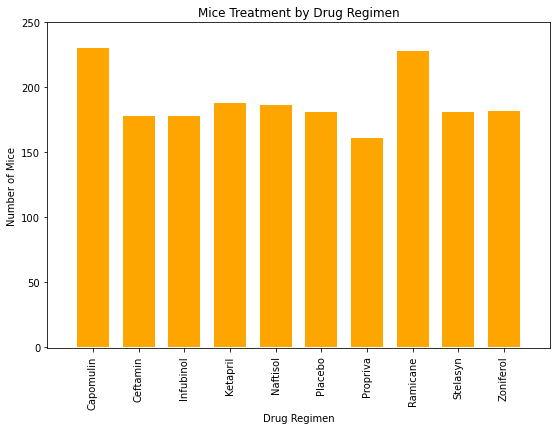

In [91]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_counts = combined_data.groupby("Drug Regimen").count()["Tumor Volume (mm3)"]
plt.figure(figsize=(9,6))
drug_counts.plot(kind='bar', color='orange', width = 0.7)
plt.xlim(-1,len(drug_counts))
plt.ylim(-1, num_of_mice+1)
plt.ylabel("Number of Mice")
plt.title("Mice Treatment by Drug Regimen")
plt.show()

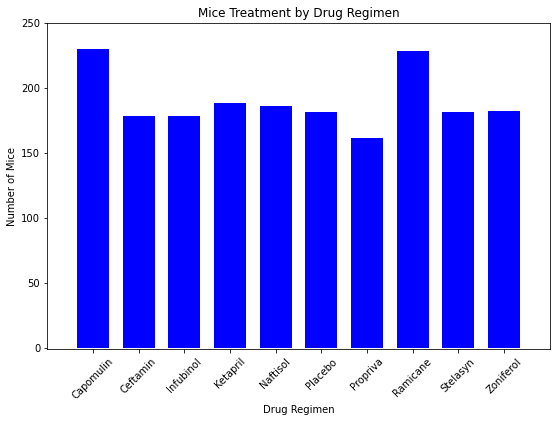

In [78]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_counts = combined_data.groupby("Drug Regimen").count()["Tumor Volume (mm3)"]
plt.figure(figsize=(9,6))
plt.bar(drug_counts.index,drug_counts.values, color='blue', width = 0.7)
plt.xticks(rotation = 45)
plt.xlim(-1,len(drug_counts))
plt.ylim(-1, num_of_mice+1)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Mice Treatment by Drug Regimen")
plt.show()

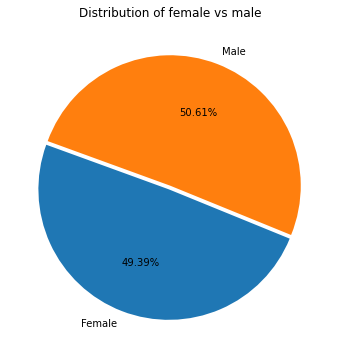

In [80]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_vs_female = combined_data.groupby("Sex").count()["Mouse ID"]
ttl_mice = male_vs_female.sum()
male_vs_female = pd.DataFrame(male_vs_female)
male_vs_female = male_vs_female.rename(columns={"Mouse ID":"Counts"})
male_vs_female.reset_index()
male_vs_female["Percentage"] = [x for x in male_vs_female["Counts"].apply(lambda x: x/ttl_mice*100)]
plt.figure(figsize=(9,6))
male_vs_female["Percentage"].plot.pie(subplots=True, explode=(0.03,0), figsize= (9,5), autopct = "%.2f%%", startangle=160);
plt.title("Distribution of female vs male")
plt.ylabel("")
plt.show()

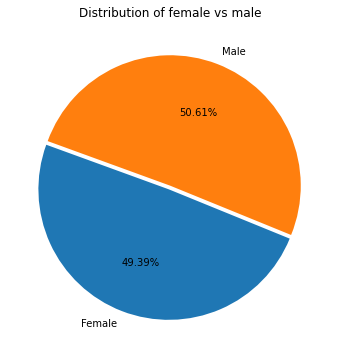

In [81]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
pct = [49.39, 50.6]
explode = (0.03, 0)
plt.figure(figsize=(9,6))
plt.pie(pct, explode=explode, labels=labels, autopct="%.2f%%",startangle=160)
plt.title("Distribution of female vs male")
plt.show()

## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

tmp_combined_data = combined_data.groupby(["Mouse ID"]).max()["Timepoint"]
tmp_combined_data = pd.DataFrame(tmp_combined_data)
tmp_combined_data
merge_df = pd.merge(tmp_combined_data,combined_data, on=["Mouse ID","Timepoint"], how ="left")
merge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [26]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes   
# add subset
# Determine outliers using upper and lower bounds
total_capo = merge_df.loc[merge_df["Drug Regimen"]=="Capomulin"]
total_rami = merge_df.loc[merge_df["Drug Regimen"]=="Ramicane"]
total_infu = merge_df.loc[merge_df["Drug Regimen"] == "Infubinol"]
total_ceft =  merge_df.loc[merge_df["Drug Regimen"]== "Ceftamin"]

# Capomulin - IQR and potential outliers 
quartiles = total_capo["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin values below {round(lower_bound,2)} and above {round(upper_bound,2)} could be outliers.")

# Ramican - IQR and potential outliers 
quartiles = total_rami["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ramican values below {round(lower_bound,2)} and above {round(upper_bound,2)} could be outliers.")

# Infubinol - IQR and potential outliers 
quartiles = total_infu["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Infubinol values below {round(lower_bound,2)} and above {round(upper_bound,2)} could be outliers.")

# Ceftamin - IQR and potential outliers 
quartiles = total_ceft["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Ceftamin values below {round(lower_bound,2)} and above {round(upper_bound,2)} could be outliers.")

Capomulin values below 20.7 and above 51.83 could be outliers.
Ramican values below 17.91 and above 54.31 could be outliers.
Infubinol values below 36.83 and above 82.74 could be outliers.
Ceftamin values below 25.36 and above 87.67 could be outliers.


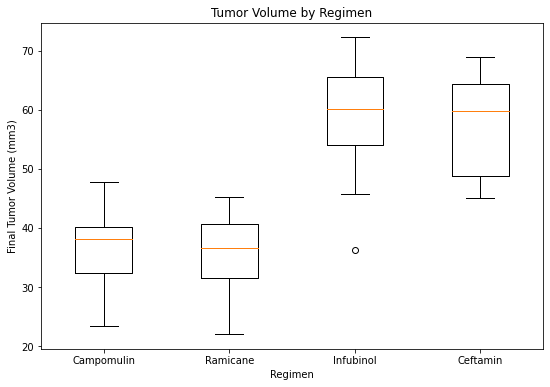

In [82]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Campomulin", "Ramicane", "Infubinol", "Ceftamin" ]

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.figure(figsize=(9,6))
plt.boxplot([total_capo["Tumor Volume (mm3)"], total_rami["Tumor Volume (mm3)"], total_infu["Tumor Volume (mm3)"], total_ceft["Tumor Volume (mm3)"]]);
plt.xticks([1, 2, 3, 4], treatments);
plt.title("Tumor Volume by Regimen")
plt.xlabel("Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [47]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_df = combined_data.loc[combined_data["Drug Regimen"]=="Capomulin"]
capo_df
selected_mouse = capo_df.loc[capo_df["Mouse ID"]=='r157']
selected_mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0
1455,r157,Capomulin,Male,22,25,15,46.539206,0


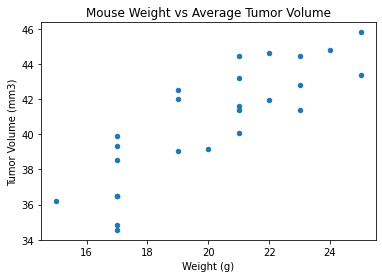

In [90]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
ave_vol_capo = capo_df.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
mouse_weight_capo = capo_df.groupby("Mouse ID").mean()["Weight (g)"]
grouped_capo_df = pd.merge(ave_vol_capo, mouse_weight_capo, how= "inner", on="Mouse ID")
grouped_capo_df.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", title="Mouse Weight vs Average Tumor Volume");
plt.show()

## Correlation and Regression

In [49]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(grouped_capo_df["Weight (g)"], grouped_capo_df["Tumor Volume (mm3)"])
print(f"The correlation coefficient between mouse weight and its tumor volume is {round(correlation[0],2)}")


The correlation coefficient between mouse weight and its tumor volume is 0.84


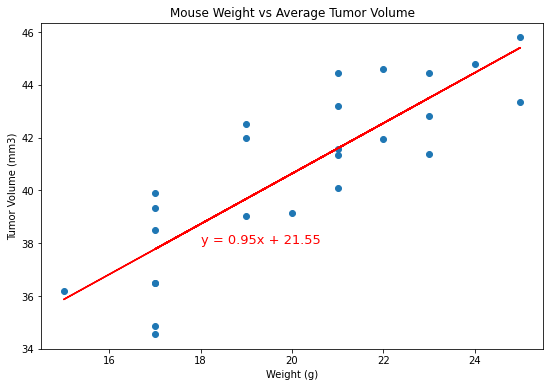

In [87]:
# calculating and determining linear regression model
x_values = grouped_capo_df["Weight (g)"]
y_values = grouped_capo_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(9,6))
plt.annotate(line_eq,(18,38),fontsize=13,color="red")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()